### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#191970;">Project 6 - Text Mining nltk - Part 2
    
#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708090;">by - Madhu Narayanan  



**Problem Statement**

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Importing required libraries for the problem statement given above.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
import random
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from wordcloud import WordCloud,STOPWORDS
import os

nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/madhunarayanan/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madhunarayanan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madhunarayanan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load the file 'inaugural' available in the corpus of nltk 

In [3]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [4]:
rvtxt = open('1941-Roosevelt.txt').read()
print(rvtxt)


On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [5]:
kentxt = open('1961-Kennedy.txt').read()
print(kentxt)



Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [6]:
nixtxt = open('1973-Nixon.txt').read()
print(nixtxt)



Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

In [7]:
print(inaugural.raw('1941-Roosevelt.txt'))
print(inaugural.raw('1961-Kennedy.txt'))
print(inaugural.raw('1973-Nixon.txt'))

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

<b>Number of Characters in the Text:</b>

In [8]:
print(len(rvtxt))
print(len(kentxt))
print(len(nixtxt))

7571
7618
9991


<b>Number of Words in the Text:</b>

In [9]:
print(len(inaugural.words('1941-Roosevelt.txt')))
print(len(inaugural.words('1961-Kennedy.txt')))
print(len(inaugural.words('1973-Nixon.txt')))

1536
1546
2028


<b>Number of Sentences in the Text:</b>

In [10]:
print(len(inaugural.sents('1941-Roosevelt.txt')))
print(len(inaugural.sents('1961-Kennedy.txt')))
print(len(inaugural.sents('1973-Nixon.txt')))

68
52
69


In [11]:
rvtxt.replace('rt ',"").replace('@','').replace('--','').replace('#','').replace('[^\w\s]','').replace('[1-9]','')


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock  to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democrac

In [12]:
kentxt.replace('rt ',"").replace('@','').replace('--','').replace('#','').replace('[^\w\s]','').replace('[1-9]','')


'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom  symbolizing an end, as well as a beginning  signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe  the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation 

In [31]:
nixtxt.replace('rt ',"").replace('@','').replace('--','').replace('#','').replace('[^\w\s]','').replace('[1-9]','')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [32]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.append('--')
stopwords.append('know')


rv_all_words = (w.lower() for w in inaugural.words((('1941-Roosevelt.txt'))))
rv_all_words_clean = [word for word in rv_all_words if word not in stopwords]



rv_all_words_freq = nltk.FreqDist(rv_all_words_clean)

rv_word_features = [item[0] for item in rv_all_words_freq.most_common(2030)]

In [33]:
rv_all_words_freq

FreqDist({'nation': 12, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, 'human': 5, ...})

In [35]:
rv_word_features[0:3]

['nation', 'spirit', 'life']

In [38]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.append('--')
stopwords.append('let')
stopwords.append('us')
stopwords.append('sides')
stopwords.append('new')
ken_all_words = (w.lower() for w in inaugural.words((('1961-Kennedy.txt'))))
ken_all_words_clean = [word for word in ken_all_words if word not in stopwords]



ken_all_words_freq = nltk.FreqDist(ken_all_words_clean)

ken_word_features = [item[0] for item in ken_all_words_freq.most_common(2000)]

In [39]:
ken_all_words_freq

FreqDist({'world': 8, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, 'nations': 5, 'ask': 5, 'president': 4, 'fellow': 4, ...})

In [41]:
ken_word_features[0:3]

['world', 'pledge', 'citizens']

In [42]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.append('--')
stopwords.append('us')
stopwords.append('let')
nix_all_words = (w.lower() for w in inaugural.words((('1973-Nixon.txt'))))
nix_all_words_clean = [word for word in nix_all_words if word not in stopwords]



nix_all_words_freq = nltk.FreqDist(nix_all_words_clean)

nix_word_features = [item[0] for item in nix_all_words_freq.most_common(2000)]

In [43]:
nix_all_words_freq

FreqDist({'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, 'home': 9, 'abroad': 8, ...})

In [44]:
nix_word_features[0:3]

['america', 'peace', 'world']

## Creating a Wordcloud

<b> for Roosevelt 1941 Inaugural Speech</b>

In [45]:
rvtxt[:31] #Checking a sentence at random!

'On each national day of inaugur'

In [46]:
rdf=rv_all_words_clean

rdf

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [47]:
wc_rv = ' '.join(rv_all_words_clean)

In [48]:
wc_rv

'national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measured material things vita

In [49]:
# Word Cloud 
from wordcloud import WordCloud
rv_wordcloud = WordCloud(width = 4000, height = 4000, 
                background_color ='darkgrey', 
                min_font_size = 10, random_state=100).generate(wc_rv) 
  


Word Cloud for Roosevelt Inaugural Speech (after cleaning)!!


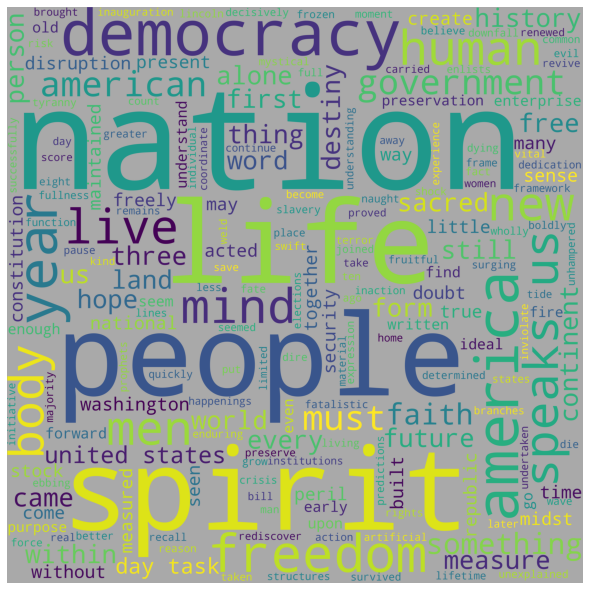

In [50]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(rv_wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt Inaugural Speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

<b> for John F.Kennedy 1961 Inaugural Speech</b>

In [51]:
kentxt[:31] #Checking a sentence at random!

'Vice President Johnson, Mr. Spe'

In [52]:
kendf=ken_all_words_clean

kendf

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike',
 'torc

In [53]:
wc_ken = ' '.join(kendf)

In [54]:
wc_ken

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success liberty

In [55]:
# Word Cloud 
from wordcloud import WordCloud
ken_wordcloud = WordCloud(width = 4000, height = 4000, 
                background_color ='darkblue', 
                min_font_size = 10, random_state=100).generate(wc_ken) 
  


Word Cloud for John F.Kennedy Inaugural Speech (after cleaning)!!


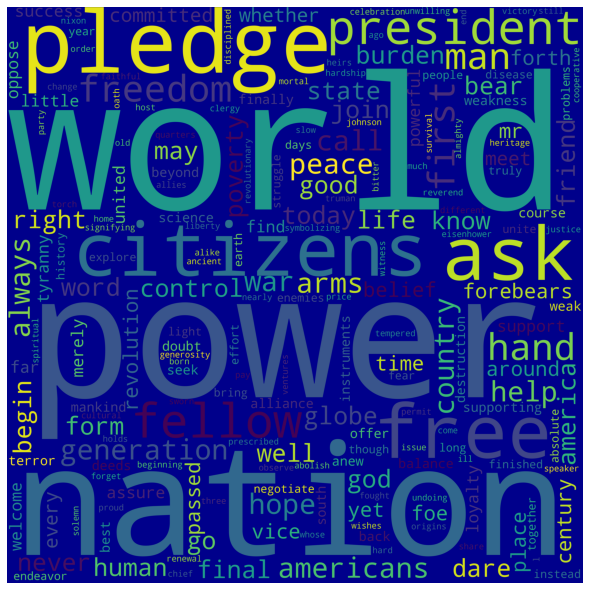

In [56]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(ken_wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for John F.Kennedy Inaugural Speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

<b> for Nixon 1973 Inaugural Speech</b>

In [57]:
nixtxt[:31] #Checking a sentence at random!

'Mr. Vice President, Mr. Speaker'

In [58]:
nixdf=nix_all_words_clean

nixdf

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'shall',
 'use',
 'peace',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',
 'revitalize',
 'traditional',
 'frie

In [59]:
wc_nix = ' '.join(nixdf)

In [60]:
wc_nix

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question shall use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations america role mai

In [63]:
# Word Cloud 
from wordcloud import WordCloud
nix_wordcloud = WordCloud(width = 4000, height = 4000, 
                background_color ='orange', 
                min_font_size = 10, random_state=100).generate(wc_nix) 
  


Word Cloud for Nixon Inaugural Speech (after cleaning)!!


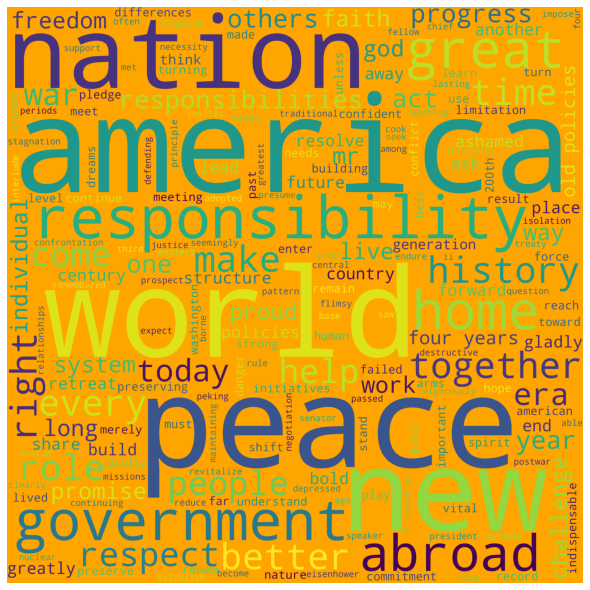

In [64]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(nix_wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Inaugural Speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

--------------------------------------------------- END of Report Part-2 --------------------------------------------------------------